![alt text](null.png "Title")

We will have a look at **support vector machines** for classification purposes. 

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
sns.set()

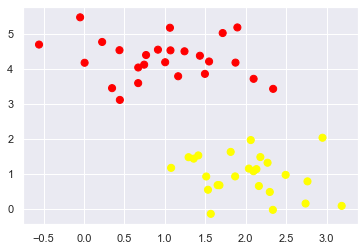

In [53]:
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples=50, centers=2,
                 random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Now a typical linear discriminative classifier would draw a hyperplane or a line separating the two classes. But, a problem we encounter here is that there can be many such lines.

(-1, 3.5)

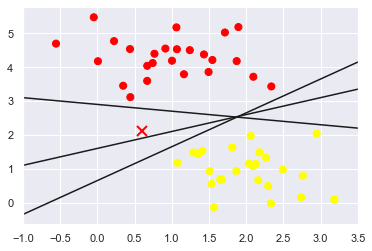

In [11]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m,b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
    
plt.xlim(-1, 3.5)

Depending on what line we choose as our separator the new data point marked by $x$ will be place in a category accordingly. We start solving this problem by firstly not drawing only a line but a margin along with it.

(-1, 3.5)

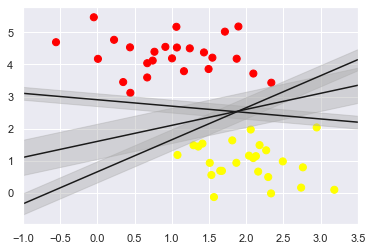

In [14]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit-d, yfit+d, edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5)

In a classical SVM scenario, we attempt to find the line that maximizes this margin. SVM is essentially a maximum margin estimator. 

In [56]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [59]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        
        x = np.linspace(xlim[0], ylim[1], 30)
        y = np.linspace(ylim[0], ylim[1], 30)
        Y,X = np.meshgrid(y, x)
        xy = np.vstack([X.ravel(), Y.ravel()]).T
        P = model.decision_function(xy).reshape(X.shape)

        ax.contour(X, Y, P, colors='k',
                   levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])
        
        if plot_support:
            ax.scatter(model.support_vectors_[:, 0],
                       model.support_vectors_[:, 1],
                       s=300, linewidth=1, facecolors='none')
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

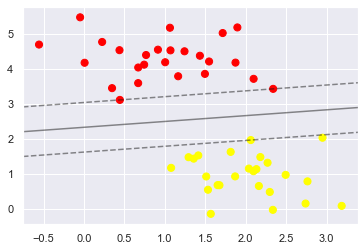

In [60]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

The points that are just touching the margin are known as the support vectors. We can essentially use various other types of Kernel functions to separate data that might not be linearly separable in original dimensions.

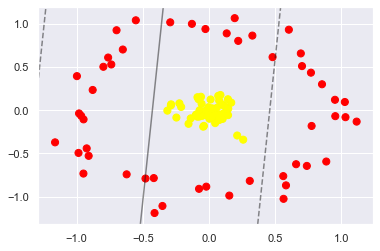

In [64]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=0.1, noise=0.1)

clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

As it stands we can see that a linear separator is not really doing its job. But if we project this data into higher dimensions then we might just be able to capture separability in this data. We typically use a radial basis function for this job. 

In [65]:
r = np.exp(-(X**2).sum(1))

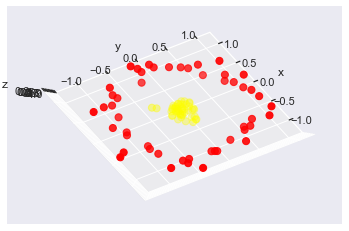

<function __main__.plot_3D(elev=30, azim=30, X=array([[-7.98177266e-01,  5.02475365e-01],
       [ 1.11614814e+00, -1.31949003e-01],
       [-1.54517615e-01, -1.57499971e-01],
       [ 8.54394152e-01,  3.00307038e-01],
       [-9.09445039e-01, -5.28262764e-01],
       [ 6.94272892e-01,  6.57177174e-01],
       [-9.98178578e-01,  3.94487657e-01],
       [ 1.53691202e-01, -9.88025426e-01],
       [-2.67368164e-02,  9.39744336e-01],
       [-8.79055112e-01,  2.34321455e-01],
       [ 1.16493611e-01,  4.81153677e-02],
       [-7.90536964e-02,  1.27521538e-01],
       [-7.62172662e-01,  6.09604652e-01],
       [ 7.01326559e-02,  1.66198432e-01],
       [-3.51614748e-01, -1.10839950e+00],
       [-3.14527892e-01, -4.87729999e-03],
       [-3.51067428e-03,  3.46370409e-02],
       [ 1.03469870e-01, -1.00173525e-01],
       [-1.29004177e-01,  9.99411858e-01],
       [-7.08732195e-02, -6.18719342e-04],
       [ 1.22975823e-02,  1.24352579e-01],
       [ 1.43484675e-01,  1.27053623e-01],
       

In [78]:
from mpl_toolkits import mplot3d
from ipywidgets import *

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180), X=fixed(X), y=fixed(y))

Note that this method of transforming data into higher dimensions using transformative projections is known as **kernel transformation**. The idea however with SVM is that projecting data to $n$ dimensions as $n$ becomes large, becomes computationally expensive and hence we utilize a **kernel trick** which is a method of fitting the model on something equivalent to a kernel transformed dataset instead of actually performing the transformations.

In [79]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

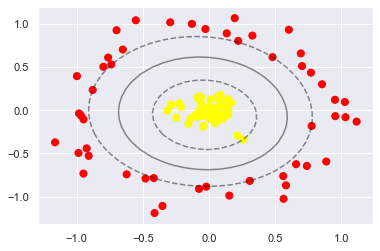

In [80]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')

Now we would like to tune our model such that it allows for a bit of overlap. 

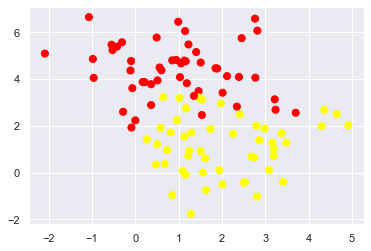

In [81]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Note that $C$ is a parameter that lets us control the hardness of the margin - or the number of observations that are allowed to pass through it.

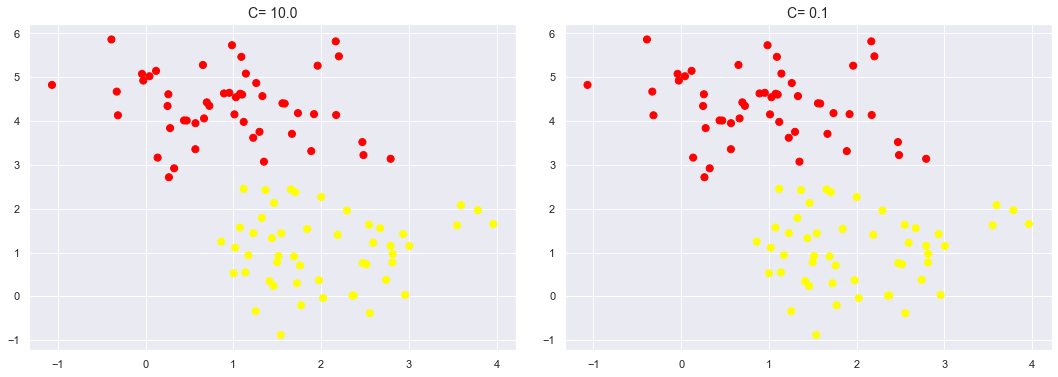

In [86]:
X, y = make_blobs(n_samples=100,  centers=2,
                  random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none')
    axi.set_title('C= {0:.1f}'.format(C), size=14)

Now we shall have a look at **principal component analysis**. 

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593763,
 1.0195904306706842)

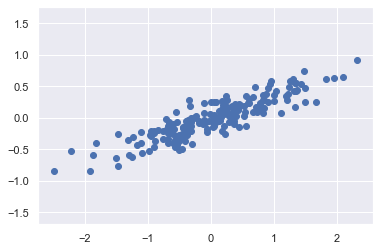

In [95]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

Here we essentially try to quantify the relationship in our data by looking at principal axes. 

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [97]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [98]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Our main attempt here is to transform the data axes to the principal component axes. The point of doing this to dimensionally reduce the data while preserving the maximal data variance exhibited.